In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'1.14.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train = x_train / 255
x_test = x_test / 255

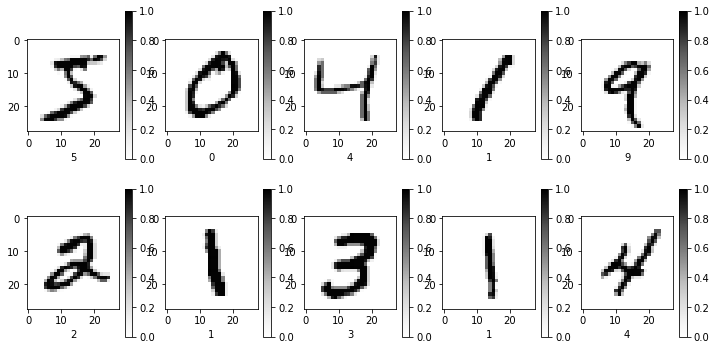

In [5]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='Greys')
    plt.colorbar()
    plt.xlabel(y_train[i])
plt.show()

In [6]:
x_train.shape, x_train[0].shape

((60000, 28, 28), (28, 28))

In [32]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='Adagrad',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(
    x_train,
    y_train,
    epochs=40
)

Epoch 1/40
60000/60000 [==============================] - 3s 55us/sample - loss: 1.3106 - acc: 0.7220
Epoch 2/40
60000/60000 [==============================] - 3s 51us/sample - loss: 0.9091 - acc: 0.8193
Epoch 3/40
60000/60000 [==============================] - 3s 58us/sample - loss: 0.7826 - acc: 0.8367
Epoch 4/40
60000/60000 [==============================] - 3s 56us/sample - loss: 0.7120 - acc: 0.8457
Epoch 5/40
60000/60000 [==============================] - 4s 58us/sample - loss: 0.6652 - acc: 0.8519
Epoch 6/40
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6310 - acc: 0.85660s - loss: 0.6318 - acc: 
Epoch 7/40
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6047 - acc: 0.8602
Epoch 8/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5836 - acc: 0.8634
Epoch 9/40
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5662 - acc: 0.8659
Epoch 10/40
60000/60000 [==============================] 

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.3970 - acc: 0.8970
Test accuracy: 0.897
Test loss: 0.39699826731681825


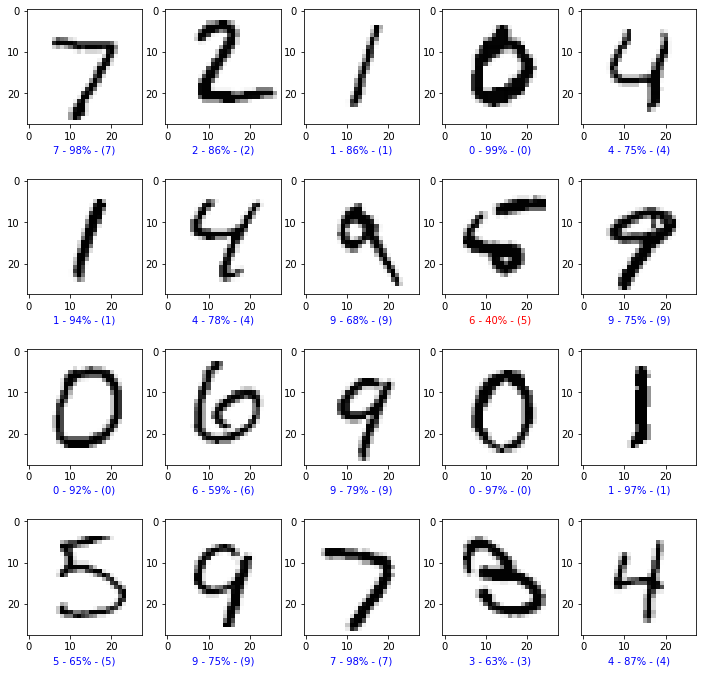

In [34]:
plt.figure(figsize=(12, 12))
predictions = model.predict(x_test[:20])
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i], cmap='Greys')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} - {:2.0f}% - ({})".format(predicted_label,
                                        100*np.max(predictions[i]),
                                        true_label),
              color=color)
plt.show()

In [21]:
weights[0].reshape(10, 28, 28)[0].shape

(28, 28)

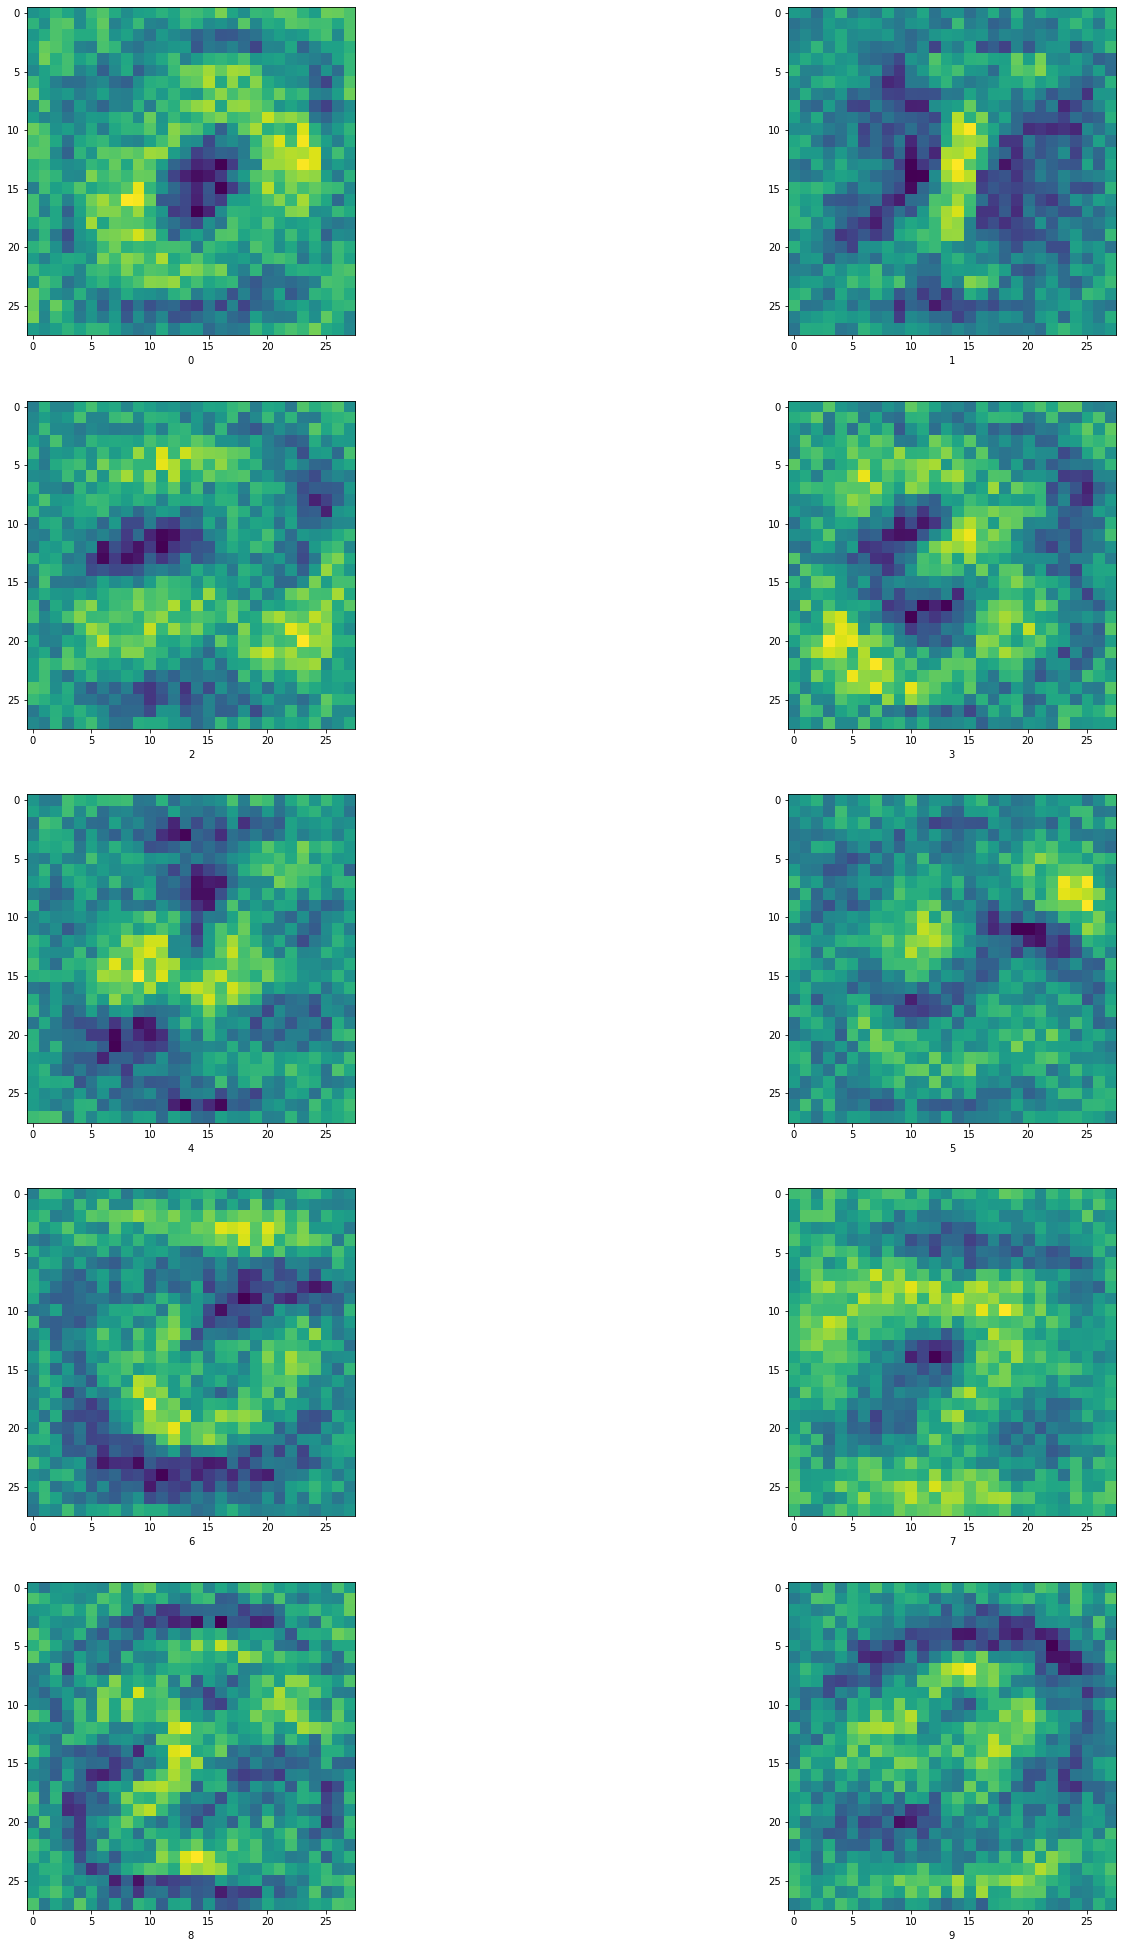

In [35]:
weights = model.get_weights()
plt.figure(figsize=(25, 35))j
for i, weight in enumerate(weights[0].transpose().reshape(10, 28, 28)):
    plt.subplot(5, 2, i+1)
    plt.imshow(weight)
    plt.xlabel(i)
plt.show()